IMPORTING LIBRARIES

In [19]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Importing dataset

In [20]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Kaushal,27,70000
1,Rohit,29,90000
2,Aniket,29,61000
3,Raj,28,60000
4,Soumitra,42,150000


Text(0, 0.5, 'Income($)')

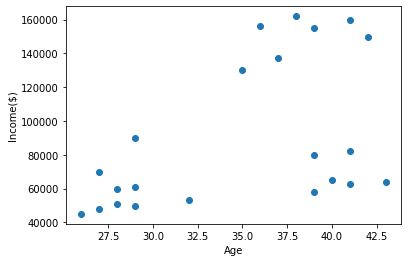

In [21]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [22]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [23]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Kaushal,27,70000,2
1,Rohit,29,90000,2
2,Aniket,29,61000,0
3,Raj,28,60000,0
4,Soumitra,42,150000,1


In [24]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

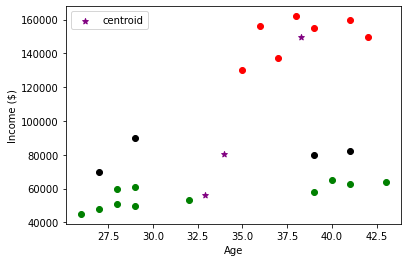

In [25]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

PREPROCESSING USING MINMAX

In [26]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [27]:
df.head()

,Name,Age,Income($),cluster
0,Kaushal,0.058824,0.213675,2
1,Rohit,0.176471,0.384615,2
2,Aniket,0.176471,0.136752,0
3,Raj,0.117647,0.128205,0
4,Soumitra,0.941176,0.897436,1


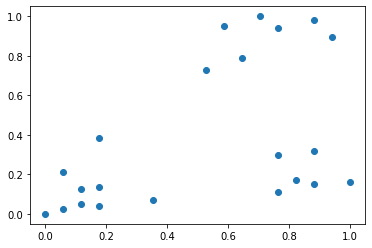

In [28]:
plt.scatter(df.Age,df['Income($)'])

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [30]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Kaushal,0.058824,0.213675,0
1,Rohit,0.176471,0.384615,0
2,Aniket,0.176471,0.136752,0
3,Raj,0.117647,0.128205,0
4,Soumitra,0.941176,0.897436,1


In [31]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

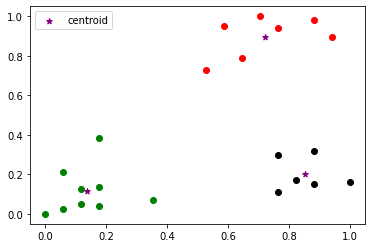

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [33]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

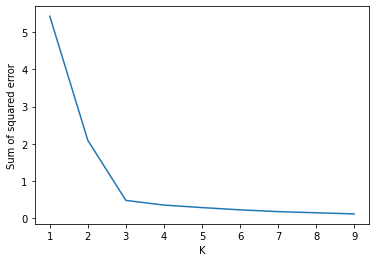

In [34]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)